![title](DEP_LOGO_2.jpg)

# Trend Station Water Quality Data 
## Web Application Demo

In [135]:
#HIDDEN

import ipywidgets as widgets
from ipywidgets import interact
import pandas as pd
import csv
from geopy.geocoders import Nominatim
from time import sleep
import folium
import matplotlib
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from folium.plugins import MarkerCluster
import seaborn as sns
from scipy import stats

In [2]:
#HIDDEN

dfhead = pd.read_csv('gm_export_TS_Location.csv')
dfhead = dfhead.fillna(0)
dfheadloc = dfhead[dfhead.latitude != 0]

geolocator = Nominatim(user_agent="specify_your_app_name_here")
location = geolocator.geocode("Flatwoods, WV")

longitude = location.longitude
latitude = location.latitude

# create map of West Virginia using latitude and longitude values
ts_locations = folium.Map(location=[latitude, longitude], tiles="OpenStreetMap", zoom_start=7.4)

# add markers to map
for lat, lng, label in zip(dfheadloc['latitude'], dfheadloc['longitude'], dfheadloc['station_id']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=True).add_to(ts_locations)  

ts_locations

## Trend Station Location

In [3]:
#HIDDEN

dfhead = pd.read_csv('gm_export_TS_Location.csv')
dfhead = dfhead.fillna(0)
dfheadloc = dfhead[dfhead.latitude != 0]


def unique_sorted_values(array):
    unique = array.unique().tolist()
    unique.sort()
    return unique

dropdown_stations_id = widgets.Dropdown(options = unique_sorted_values(dfheadloc.station_id), description='Trend Station')

output_two = widgets.Output()



def common_filtering(station):
    
    output_two.clear_output()
    
    
    global common_filter
    common_filter = dfheadloc[(dfheadloc.station_id == station)]
    
    with output_two:
        display(common_filter)
        
    
        
def dropdown_stations_id_eventhandler(change):
    common_filtering(change.new)

    
dropdown_stations_id.observe(dropdown_stations_id_eventhandler, names='value')
    
display(dropdown_stations_id)


Dropdown(description='Trend Station', options=('TS001', 'TS002', 'TS003', 'TS004', 'TS005', 'TS006', 'TS007', …

In [4]:
#HIDDEN
display(output_two)

Output()

## Trend Station Data

In [58]:
#HIDDEN

df_comb = pd.read_csv('TS_New_Combined_Final.csv')
df_comb = df_comb.fillna(0)
#df_comb['test_batch_id'] = pd.to_datetime(df_comb['test_batch_id'], format="%m/%d/%Y")
df_comb['result_value'] = pd.to_numeric(df_comb['result_value'])
df_comb = df_comb.sort_values(by=['station_id', 'test_batch_id'])
#df_comb = df_comb.set_index('test_batch_id')

ALL = 'ALL'

def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

dropdown_stations = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_comb.station_id), description='Trend Station')
dropdown_param = widgets.Dropdown(options = unique_sorted_values_plus_ALL(df_comb.param_name), description='Parameter')

output_three = widgets.Output()
plot_output = widgets.Output()


def common_filtering1(station, param):
    
    output_three.clear_output()
    plot_output.clear_output()
    
    if (station == ALL) & (param == ALL):
        global common_filter1
        common_filter1 = df_comb
    elif (station == ALL):
        common_filter1 = df_comb[df_comb.param_name == param]
    elif (param == ALL):
        common_filter1 = df_comb[df_comb.station_id == station]
    else:
        common_filter1 = df_comb[(df_comb.station_id == station) & (df_comb.param_name == param)]
    
    with output_three:
        display(common_filter1)
        
    with plot_output:
        if param == ALL or station == ALL:
            print("No Available Plots for the Selected Station/Parameter Combination!")
        else:
            plt.figure(figsize=(20,8));
            plt.plot(common_filter1['result_value'], 'go--', linewidth=1, markersize=6);
            plt.grid();
            plt.ylabel(param, fontsize=15);
            plt.xlabel('Date', fontsize=15);
            plt.title(station, fontsize=25);
            plt.show();


def dropdown_stations_eventhandler(change):
    common_filtering1(change.new, dropdown_param.value)
    
def dropdown_param_eventhandler(change):
    common_filtering1(dropdown_stations.value, change.new)
    
dropdown_stations.observe(dropdown_stations_eventhandler, names='value')
dropdown_param.observe(dropdown_param_eventhandler, names='value')
    
display(dropdown_stations)
display(dropdown_param)

Dropdown(description='Trend Station', options=('ALL', 'TS001', 'TS002', 'TS003', 'TS004', 'TS005', 'TS006', 'T…

Dropdown(description='Parameter', options=('ALL', 'ALKALINITY', 'ALUMINUM', 'ANTIMONY', 'ARSENIC', 'BERYLLIUM'…

In [53]:
#HIDDEN
display(output_three)

Output()

In [36]:
#HIDDEN
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
display(plot_output)

Output(outputs=({'output_type': 'stream', 'text': 'No Available Plots for the Selected Station/Parameter Combi…

## Trend Station Statistics

Need to convert DataFrame structure prior to this step!

In [37]:
group = common_filter1.groupby('param_name')
df2 = pd.DataFrame(group.apply(lambda x: x['test_batch_id'].unique()))

df2.reset_index(inplace=True)
df2 = df2.rename({0: 'DATES'}, axis='columns')
df2

param_name                                              DATES
0           ALKALINITY  [1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1...
1             ALUMINUM  [1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1...
2             ANTIMONY  [1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1...
3              ARSENIC  [1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1...
4            BERYLLIUM  [1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1...
5         BI-CARBONATE  [1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1...
6              CADMIUM  [1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1...
7              CALCIUM  [1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1...
8            CARBONATE  [1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1...
9             CHROMIUM  [1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1...
10              COPPER  [1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1...
11             CYANIDE  [1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1...
12    DISSOLVED SOLIDS  [1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1...
13  FIELD CONDUCTIVITY  [1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1...
14            FIELD ph  [1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1...
15                FLOW  [1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1...
16         HOT ACIDITY  [1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1...
17                IRON  [1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1...
18    LAB CONDUCTIVITY  [1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1...
19              LAB pH  [1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1...
20                LEAD  [1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1...
21           MAGNESIUM  [1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1...
22           MANGANESE  [1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1...
23             MERCURY  [1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1...
24     MINERAL ACIDITY  [1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1...
25              NICKEL  [1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1...
26             NITRATE  [1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1...
27             PHENOLS  [1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1...
28           PHOSPHATE  [1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1...
29           POTASSIUM  [1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1...
30            SELENIUM  [1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1...
31              SILVER  [1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1...
32              SODIUM  [1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1...
33             SULFATE  [1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1...
34    SUSPENDED SOLIDS  [1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1...
35         TEMPERATURE  [1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1...
36            THALLIUM  [1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1...
37                ZINC  [1/1/2016, 1/1/2017, 1/1/2018, 10/1/2016, 10/1...

In [38]:
param_dates = df2[df2.param_name == 'BERYLLIUM'].DATES.item()
param_dates[5]

'4/1/2016'

In [39]:
for i in param_dates:
    print(i)

1/1/2016
1/1/2017
1/1/2018
10/1/2016
10/1/2017
4/1/2016
4/1/2017
4/1/2018
8/1/2016


In [72]:
ts = dropdown_stations.value

output_four = widgets.Output()

df_comb = pd.read_csv('TS_New_Combined_Final.csv')
df_comb = df_comb.fillna(0)
df_comb = df_comb[df_comb['station_id'].str.contains(ts, na=False)]

group = df_comb.groupby('param_name')
df2 = pd.DataFrame(group.apply(lambda x: x['test_batch_id'].unique()))

df2.reset_index(inplace=True)
df2 = df2.rename({0: 'DATES'}, axis='columns')

dates = df2[df2.param_name == 'BERYLLIUM'].DATES.item()

initial_date = dates[0]

df_comb_date = common_filter1[common_filter1['station_id'].str.contains(ts, na=False)]
df_comb_date = df_comb_date[df_comb_date['test_batch_id'] == initial_date]
df_comb_date = df_comb_date.drop(['station_id', 'sample_id', 'fraction', 'result_unit', 'test_batch_id'], axis=1)
df_comb_date = df_comb_date.set_index('param_name').transpose()

#df_comb_date = df_comb_date.astype('float')
df_comb_date.columns = ['FIELD ph', 'FIELD CONDUCTIVITY','TEMPERATURE','FLOW', 'LAB CONDUCTIVITY', 'SULFATE', 'DISSOLVED SOLIDS', 'SUSPENDED SOLIDS', 'LAB ph', 'ALKALINITY', 'HOT ACIDITY', 'MINERAL ACIDITY', 'IRON_D', 'MANGANESE_D', 'ALUMINUM_D', 'IRON_T', 'MANGANESE_T', 'ALUMINUM_T', 'ANTIMONY', 'ARSENIC', 'BERYLLIUM', 'CADMIUM', 'CHROMIUM', 'COPPER', 'LEAD', 'MERCURY', 'NICKEL', 'SELENIUM', 'SILVER', 'THALLIUM', 'ZINC', 'CYANIDE', 'PHENOLS', 'NITRATE', 'SODIUM', 'CALCIUM', 'MAGNESIUM', 'POTASSIUM', 'BI-CARBONATE', 'CARBONATE', 'PHOSPHATE']

df_comb_concat = []
df_comb_concat = pd.concat([df_comb_date])

as_list = df_comb_concat.index.tolist()
idx = as_list.index('result_value')
as_list[idx] = initial_date
df_comb_concat.index = as_list

for i, date in enumerate(dates):
    
    df_comb_date = common_filter1[common_filter1['station_id'].str.contains(ts, na=False)]
    df_comb_date = df_comb_date[df_comb_date['test_batch_id'] == dates[i]]
    df_comb_date = df_comb_date.drop(['station_id', 'sample_id', 'fraction', 'result_unit', 'test_batch_id'], axis=1)
    df_comb_date = df_comb_date.set_index('param_name').transpose()
    
    #df_comb_date = df_comb_date.astype('float')

    df_comb_date.columns = ['FIELD ph', 'FIELD CONDUCTIVITY','TEMPERATURE','FLOW', 'LAB CONDUCTIVITY', 'SULFATE', 'DISSOLVED SOLIDS', 'SUSPENDED SOLIDS', 'LAB ph', 'ALKALINITY', 'HOT ACIDITY', 'MINERAL ACIDITY', 'IRON_D', 'MANGANESE_D', 'ALUMINUM_D', 'IRON_T', 'MANGANESE_T', 'ALUMINUM_T', 'ANTIMONY', 'ARSENIC', 'BERYLLIUM', 'CADMIUM', 'CHROMIUM', 'COPPER', 'LEAD', 'MERCURY', 'NICKEL', 'SELENIUM', 'SILVER', 'THALLIUM', 'ZINC', 'CYANIDE', 'PHENOLS', 'NITRATE', 'SODIUM', 'CALCIUM', 'MAGNESIUM', 'POTASSIUM', 'BI-CARBONATE', 'CARBONATE', 'PHOSPHATE']
    
    df_comb_concat = pd.concat([df_comb_concat, df_comb_date])
    
    as_list = df_comb_concat.index.tolist()
    idx = as_list.index('result_value')
    as_list[idx] = dates[i]
    df_comb_concat.index = as_list

    df_comb_concat.index.name = str(dropdown_stations.value)
        
df_comb_concat = df_comb_concat.fillna(0)
    
df_comb_concat = df_comb_concat.loc[:, (df_comb_date != 0).any(axis=0)]

df_comb_concat.index = pd.to_datetime(df_comb_concat.index)

df_comb_concat = df_comb_concat.iloc[1:]

with output_four:
    display(df_comb_concat)

In [73]:
display(output_four)

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '            FIELD ph  FIELD CONDUCTIVI…

In [74]:
df_comb_concat.describe()

FIELD ph  FIELD CONDUCTIVITY  TEMPERATURE       FLOW  LAB CONDUCTIVITY  \
count  9.000000            9.000000     9.000000   9.000000          9.000000   
mean   8.466667          536.555556    12.388889  13.788889        544.222222   
std    0.320156          107.723153     8.133948  14.524264        122.105260   
min    7.900000          408.000000     0.000000   1.290000        426.000000   
25%    8.200000          473.000000     5.200000   5.880000        465.000000   
50%    8.500000          507.000000    13.300000   7.520000        509.000000   
75%    8.700000          579.000000    17.100000  14.060000        559.000000   
max    8.900000          744.000000    23.900000  47.400000        796.000000   

          SULFATE  DISSOLVED SOLIDS  SUSPENDED SOLIDS    LAB ph  ALKALINITY  \
count    9.000000          9.000000          9.000000  9.000000    9.000000   
mean    92.000000        361.555556          4.888889  8.208889  112.444444   
std     27.540879        123.162607          4.484541  0.276968   27.618432   
min     57.000000        238.000000          0.000000  7.730000   74.000000   
25%     68.000000        268.000000          3.000000  8.050000   98.000000   
50%     89.000000        319.000000          3.000000  8.180000  110.000000   
75%    119.000000        450.000000          6.000000  8.500000  120.000000   
max    132.000000        593.000000         14.000000  8.550000  160.000000   

         IRON_T  ALUMINUM_T   NITRATE     SODIUM    CALCIUM  MAGNESIUM  \
count  9.000000    9.000000  9.000000   9.000000   9.000000   9.000000   
mean   0.118889    0.050000  2.518889  12.997778  62.100000  23.788889   
std    0.074068    0.041231  2.117117   4.277855  16.020456   6.966786   
min    0.030000    0.000000  0.340000   7.980000  46.700000  16.700000   
25%    0.080000    0.040000  1.300000   9.400000  49.700000  18.400000   
50%    0.110000    0.040000  1.830000  12.900000  55.700000  20.700000   
75%    0.110000    0.040000  3.800000  13.000000  70.000000  26.600000   
max    0.290000    0.140000  6.820000  21.100000  93.400000  37.600000   

       POTASSIUM  BI-CARBONATE  
count   9.000000      9.000000  
mean    2.837778    102.888889  
std     1.229306     24.085496  
min     1.760000     72.000000  
25%     1.950000     90.000000  
50%     2.300000     94.000000  
75%     3.360000    120.000000  
max     4.900000    136.000000

In [75]:
df_comb_concat.corr()

FIELD ph  FIELD CONDUCTIVITY  TEMPERATURE      FLOW  \
FIELD ph            1.000000           -0.166482    -0.366885 -0.490005   
FIELD CONDUCTIVITY -0.166482            1.000000     0.270090 -0.614950   
TEMPERATURE        -0.366885            0.270090     1.000000 -0.127477   
FLOW               -0.490005           -0.614950    -0.127477  1.000000   
LAB CONDUCTIVITY   -0.242799            0.987440     0.273400 -0.568779   
SULFATE             0.323225            0.165372     0.172811 -0.415564   
DISSOLVED SOLIDS   -0.169071            0.961113     0.358300 -0.526049   
SUSPENDED SOLIDS    0.354053           -0.242824     0.206942 -0.051204   
LAB ph             -0.765923            0.417726     0.398491  0.243226   
ALKALINITY         -0.065971            0.910619     0.346012 -0.709157   
IRON_T             -0.144082            0.470548     0.592125 -0.204514   
ALUMINUM_T          0.142041            0.224303     0.196424 -0.038824   
NITRATE             0.592473           -0.301526    -0.489932  0.084267   
SODIUM             -0.202495            0.945906     0.282986 -0.686604   
CALCIUM            -0.153050            0.974679     0.205184 -0.570580   
MAGNESIUM          -0.209785            0.976762     0.290927 -0.487653   
POTASSIUM          -0.318452            0.940460     0.481915 -0.563142   
BI-CARBONATE       -0.011888            0.804834     0.278118 -0.703572   

                    LAB CONDUCTIVITY   SULFATE  DISSOLVED SOLIDS  \
FIELD ph                   -0.242799  0.323225         -0.169071   
FIELD CONDUCTIVITY          0.987440  0.165372          0.961113   
TEMPERATURE                 0.273400  0.172811          0.358300   
FLOW                       -0.568779 -0.415564         -0.526049   
LAB CONDUCTIVITY            1.000000  0.098539          0.945487   
SULFATE                     0.098539  1.000000          0.086306   
DISSOLVED SOLIDS            0.945487  0.086306          1.000000   
SUSPENDED SOLIDS           -0.252193  0.253020         -0.256515   
LAB ph                      0.428056 -0.276123          0.415159   
ALKALINITY                  0.933587  0.239931          0.848721   
IRON_T                      0.401673 -0.036766          0.571606   
ALUMINUM_T                  0.114956  0.146406          0.379569   
NITRATE                    -0.406804  0.098380         -0.210573   
SODIUM                      0.965099  0.099074          0.870603   
CALCIUM                     0.984999  0.156980          0.948149   
MAGNESIUM                   0.972033  0.120719          0.983637   
POTASSIUM                   0.946759  0.229463          0.930463   
BI-CARBONATE                0.833239  0.359923          0.692395   

                    SUSPENDED SOLIDS    LAB ph  ALKALINITY    IRON_T  \
FIELD ph                    0.354053 -0.765923   -0.065971 -0.144082   
FIELD CONDUCTIVITY         -0.242824  0.417726    0.910619  0.470548   
TEMPERATURE                 0.206942  0.398491    0.346012  0.592125   
FLOW                       -0.051204  0.243226   -0.709157 -0.204514   
LAB CONDUCTIVITY           -0.252193  0.428056    0.933587  0.401673   
SULFATE                     0.253020 -0.276123    0.239931 -0.036766   
DISSOLVED SOLIDS           -0.256515  0.415159    0.848721  0.571606   
SUSPENDED SOLIDS            1.000000 -0.488207   -0.120660 -0.301476   
LAB ph                     -0.488207  1.000000    0.261204  0.649472   
ALKALINITY                 -0.120660  0.261204    1.000000  0.351016   
IRON_T                     -0.301476  0.649472    0.351016  1.000000   
ALUMINUM_T                 -0.371818  0.307583    0.013172  0.769504   
NITRATE                     0.168903 -0.511110   -0.522468 -0.140464   
SODIUM                     -0.282538  0.374039    0.951319  0.364829   
CALCIUM                    -0.266026  0.343689    0.932175  0.366802   
MAGNESIUM                  -0.235298  0.432407    0.874456  0.482030   
POTASSIUM                  -0.270780  0.436033    0.898078  0.471675   
BI-CA

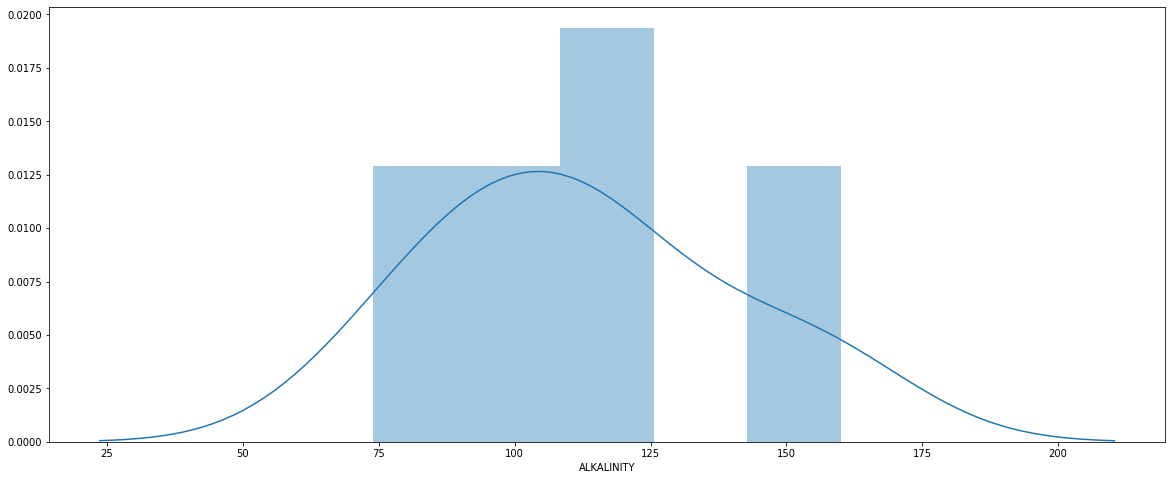

In [103]:
width = 20
height = 8
plt.figure(figsize=(width, height))
sns.distplot(df_comb_concat['ALKALINITY'])

The Pearson Correlation Coefficient is 0.848720546095548  with a P-value of P = 0.0038115502067155344


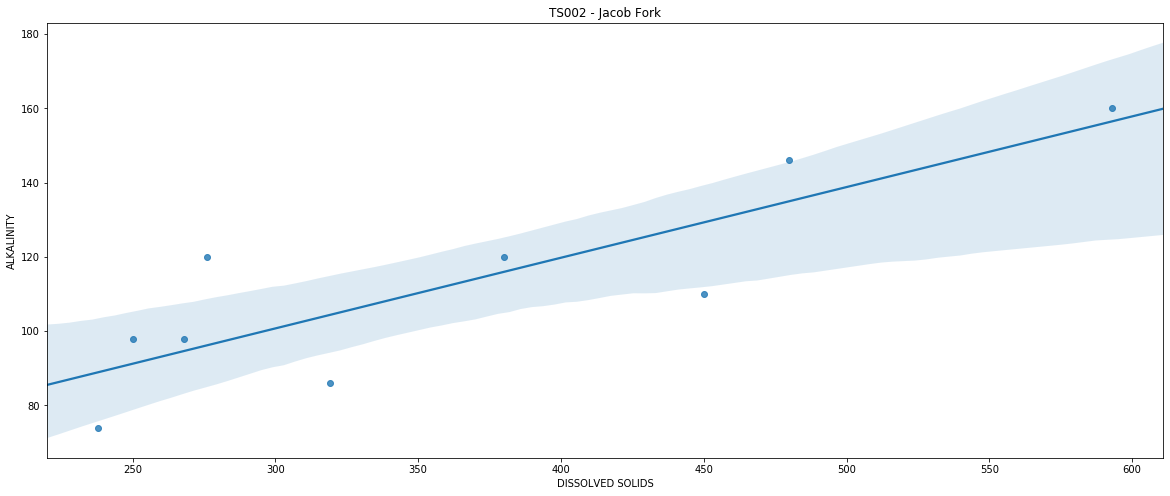

In [136]:
width = 20
height = 8
plt.figure(figsize=(width, height))
sns.regplot(df_comb_concat['DISSOLVED SOLIDS'], df_comb_concat['ALKALINITY']).set_title('TS002 - Jacob Fork')

pearson_coef, p_value = stats.pearsonr(df_comb_concat['DISSOLVED SOLIDS'], df_comb_concat['ALKALINITY'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

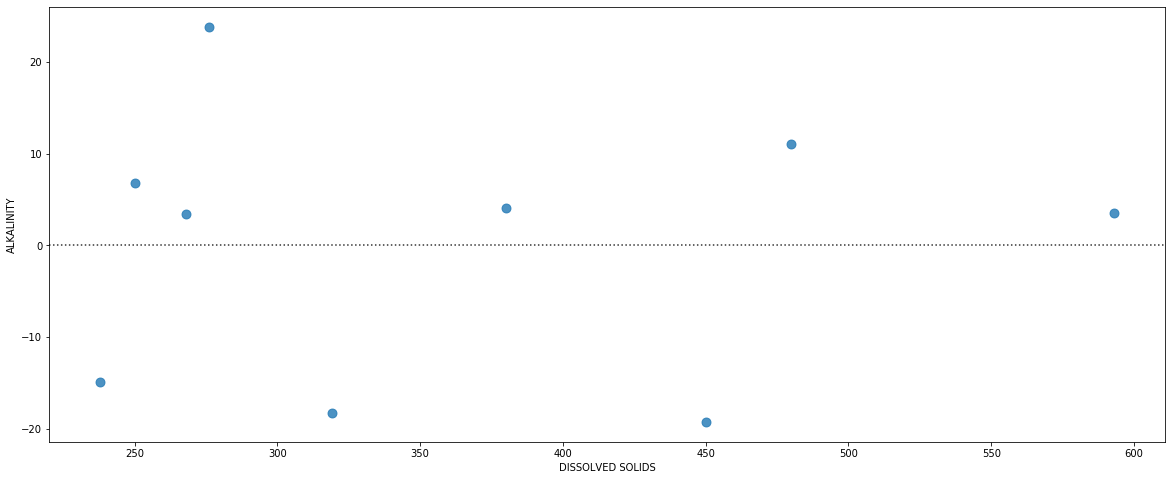

In [137]:
width = 20
height = 8
plt.figure(figsize=(width, height))
sns.residplot(x="DISSOLVED SOLIDS", y="ALKALINITY", data=df_comb_concat,scatter_kws={"s": 80});

The Pearson Correlation Coefficient is 0.5921249743912098  with a P-value of P = 0.0929770705292761


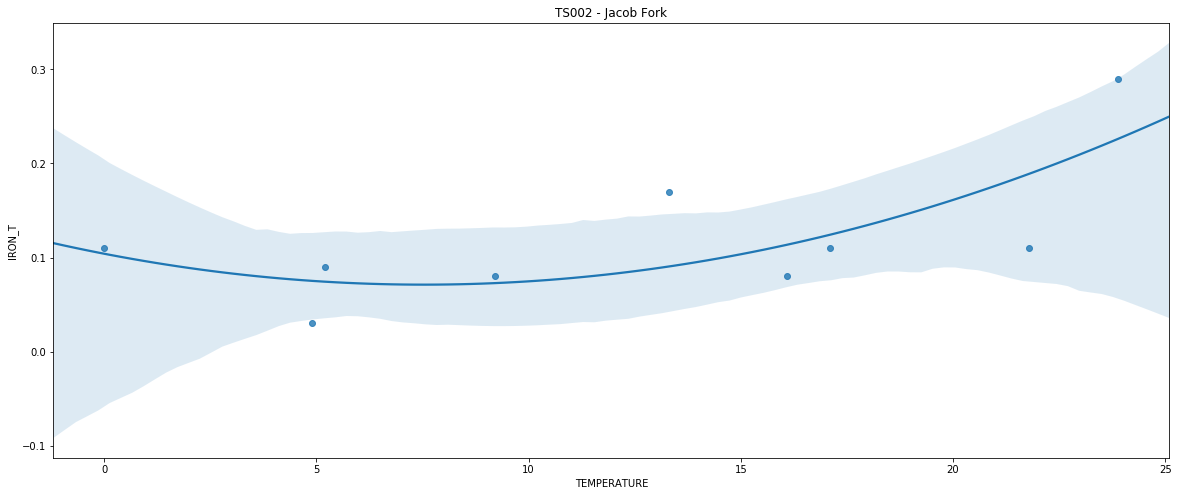

In [130]:
width = 20
height = 8
plt.figure(figsize=(width, height))
sns.regplot(df_comb_concat['TEMPERATURE'], df_comb_concat['IRON_T'], order=2).set_title('TS002 - Jacob Fork')

pearson_coef, p_value = stats.pearsonr(df_comb_concat['TEMPERATURE'], df_comb_concat['IRON_T'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

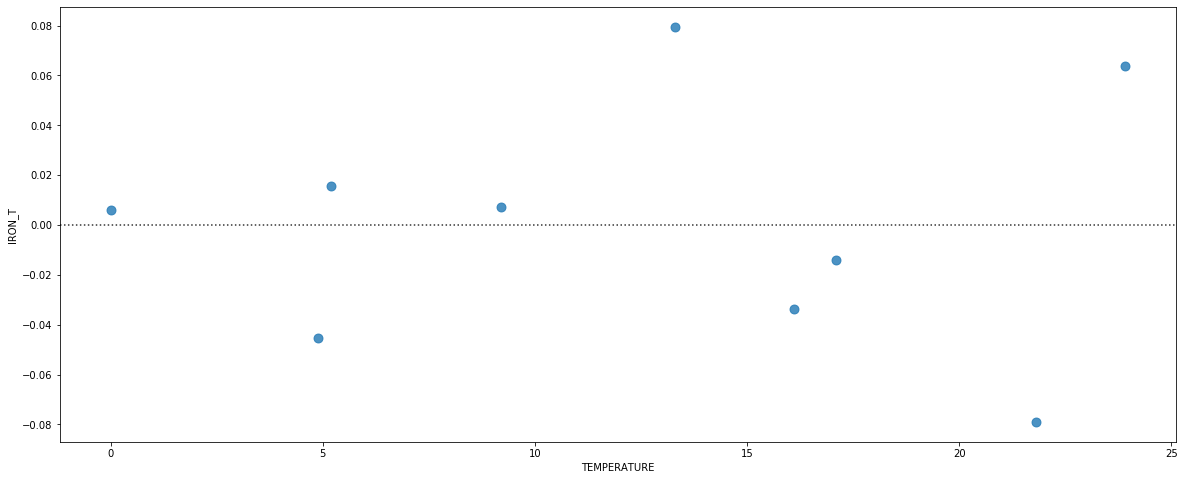

In [140]:
width = 20
height = 8
plt.figure(figsize=(width, height))
sns.residplot(x="TEMPERATURE", y="IRON_T", data=df_comb_concat, order=2, scatter_kws={"s": 80});